# Introduction:

This notebook is intended to show of the major functions of the IntelliShield package. No files produced in this notebook will be saved.

Currently this model can be run on both Google Colab and Jupyter Notebook.If you want a more comprehensive way to explore the full functionality of the IntelliShield package try running the files in the 'scripts' folder.

## Jupyter Notebook:

The Jupyter Notebook will run the code locally. This is the best option if you plan to eventually use the full script functionality.

How to set up the Jupyter Notebook:
<ol>
 <li>Create a virtual environment to run the notebook in. The requirements can be found in the 'requirements.txt' file.</li>
 <li>Download the main.ipynb file.</li>
 <li>Download the IntelliShield Package.</li>
</ol>

## Google Colab:

Google Colab will run the code on the browser. This is the best option if you want to explore the use cases of the IntelliShield package or if you lack the space to locally host/store the notebook.

How to set up Google Colab:
<ol>
 <li>Open Google Colab and click 'Open Notebook'.</li>
 <li>Click the 'GitHub' line and type in 'austineamonn/SummerResearch2024'.</li>
 <li>Open the main.ipynb notebook.</li>
</ol>

This image shows the above steps.

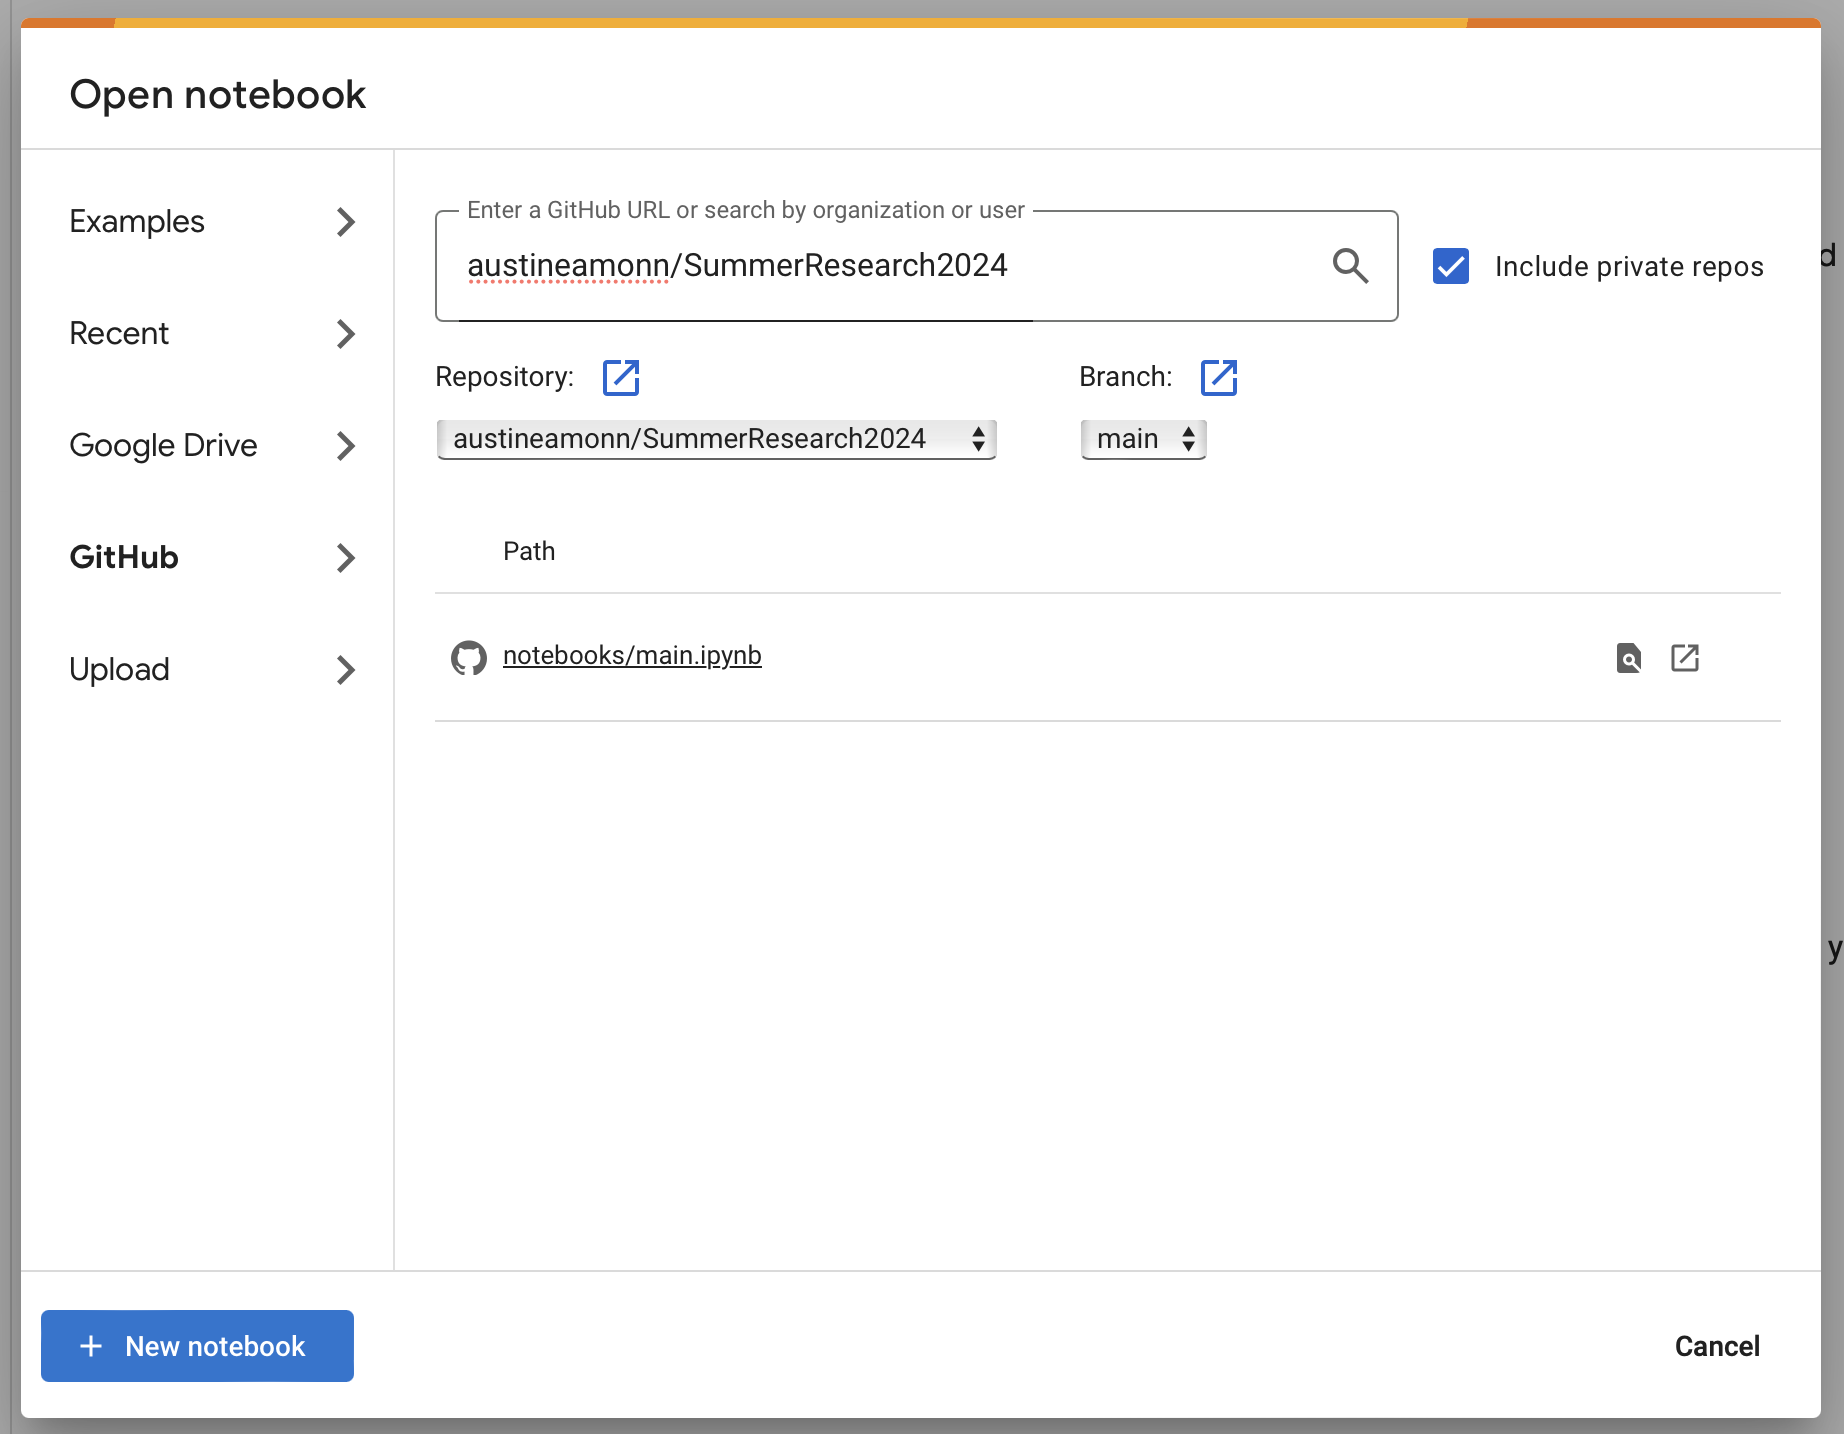

In [51]:
# Only run this for Google Colab

!git clone 'https://github.com/austineamonn/SummerResearch2024'
%pip install shap

Cloning into 'SummerResearch2024'...
remote: Enumerating objects: 22915, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (304/304), done.
Receiving objects: 100% (22915/22915), 2.80 GiB | 27.15 MiB/s, done.
remote: Total 22915 (delta 130), reused 357 (delta 81), pack-reused 22498
Resolving deltas: 100% (3377/3377), done.
Updating files: 100% (174/174), done.
Note: you may need to restart the kernel to use updated packages.


Before we begin we have some standard python libraries to import that we will use throughout this notebook.

In [52]:
import pandas as pd
import time

# Data Generation:

There was no existing dataset that contained the data needed for this project. Thus first we must generate a synthetic dataset. The dataset will be generated based on a variety of real data, mappings between datasets, and artificially generated lists.

***

First we import the Data class which contains all the data needed to generate the synthetic dataset.

Then we import the DataGenerator class for the CPU. Note that a version does exist that runs on the GPU.

The following code tries to import the functions. If you get the final error then the GitHub was not properly downloaded or cloned.

In [53]:
try: # Expected pathway for local Jupyter Notebook
    from IntelliShield.data_generation.data import Data
    from IntelliShield.data_generation.data_generation_CPU import DataGenerator
except ModuleNotFoundError:
    try: # Expected pathway for Google Colab
        from SummerResearch2024.src.IntelliShield.data_generation.data import Data
        from SummerResearch2024.src.IntelliShield.data_generation.data_generation_CPU import DataGenerator
    except ModuleNotFoundError: # Raise error as neither pathway works
        raise ModuleNotFoundError("You did not properly download or clone the repository.")

Next, we instantiate the Data and DataGenerator classes. The Data class allows us to access all the data needed to generate the synthetic dataset and the DataGenerator class allows us to use the functions needed to generate the synthetic dataset.

In [54]:
data = Data()
data_generator = DataGenerator(data)

What does the data look like? Some of the data is a list of values. Some lists were generated synthetically, others were pulled from various sources. More information can be found in the README file. Here is a list of learning styles:

In [55]:
data.learning_style()["learning_style_list"]

['Visual', 'Auditory', 'Read/Write', 'Kinesthetic']

Some of the data is a dictionary. Some dictionaries map different lists together while others map lists to demographic statistics on how common each item is. This dictionary maps the learning styles to the percentage of people that have said style.

In [56]:
data.learning_style()["learning_style"]

{'Visual': 27.27, 'Auditory': 23.56, 'Read/Write': 21.16, 'Kinesthetic': 28.01}

Now we use the generate_synthetic_dataset function to create a dataset from all the data. This function has two inputs:
- number of samples (an integer) which tell the function how many 'students' we want in our dataset
- batch size (an integer) which tells the function how to split up the work to prevent overloading the computer.
You can change the values if you want to generate more or less data. Be careful as higher values for number of samples will lead to a longer runtime.

In [57]:
num_samples = 100 # You can change these values if you want
batch_size = 10 # Batch size should be about 1/10 of the number of samples

Now we call the function. Use the time library to see how long the generator takes.

In [58]:
start_time = time.time()
synthetic_data = data_generator.generate_synthetic_dataset(num_samples, batch_size)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

28.29935383796692


'generate_synthetic_dataset' outputs a pandas dataframe. Let's examine the properties of the dataframe.

In [59]:
synthetic_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   first name                  100 non-null    object 
 1   last name                   100 non-null    object 
 2   ethnoracial group           100 non-null    object 
 3   gender                      100 non-null    object 
 4   international status        100 non-null    object 
 5   socioeconomic status        100 non-null    object 
 6   learning style              100 non-null    object 
 7   gpa                         94 non-null     float64
 8   student semester            100 non-null    int64  
 9   major                       100 non-null    object 
 10  previous courses            100 non-null    object 
 11  course types                100 non-null    object 
 12  course subjects             100 non-null    object 
 13  subjects of interest        100 non-

Lets look at the top 5 elements of the dataframe. You can look back at the README file to get a better sense of what each column contains and how it was generated.

In [60]:
synthetic_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,first name,last name,ethnoracial group,gender,international status,socioeconomic status,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,Macayla,Cerqueira,European American or white,Female,Domestic,Middle income,"[Kinesthetic, Auditory]",3.57,14,[Finance],"[Intro Computing: Engrg and Sci, Cello, Social...","[[Lecture], [Lecture-Discussion], [Lecture, Pr...","[SPED, LLS, SHS, CW, PHYS, CLE, KOR, ECON, IS,...","[Business, Law]","[Hospitality Management Club, Finance Club, La...","[Financial Manager, Accountant and Auditor, Fo...","[Marketing, Economics, Finance, Business, Mana..."
1,Adiley,Fern,African American or Black,Nonbinary,Domestic,Middle income,[Kinesthetic],3.42,1,[],"[Saxophone, Introduction to Sociology, Jazz Sa...","[[Lecture, Practice], [Lecture-Discussion, Dis...","[MUSC, SOC]","[Aerospace Engineering, Education, Environment...","[Education Society, Aviation Club]","[Other Teacher and Instructor, Aircraft Mechan...","[Physics, Computer Science, Mechanical Enginee..."
2,Soraiya,Estipona,European American or white,Female,Domestic,Middle income,[Kinesthetic],3.07,11,[Music],"[Intro Latina/Latino Studies, General Chemistr...","[[Lecture], [Lecture-Discussion], [Lecture, Pr...","[LLS, LAS, MSE, PHYS, CLE, MILS, FIN, MUS, RST...","[Linguistics, Languages, Music, Computer Science]","[Music Club, Language Clubs, Business Club, A ...","[Retail Salesperson, Waiter and Waitress, Musi...","[Dance Theater, Ethnomusicology, Sound Enginee..."
3,Ayomiposi,Brinkmeier,Latino/a/x American,Male,Domestic,In poverty,[Auditory],2.30,3,[],"[General Chemistry I, General Chemistry II, Gr...","[[Lecture], [Lecture-Discussion], [Lecture, Pr...","[CHEM, MUSC, LAS, ACCY, CS, HDFS, ADV, CMN, AS...","[Chemistry, Human Development and Family Studi...","[Fraternity Council, Chemical Engineering Club...","[Chemical Engineer, Chemist and Material Scien...","[Material Science, Chemical Engineering, Pharm..."
4,Janicia,Pay,African American or Black,Nonbinary,Domestic,Higher income,[Visual],2.50,8,[Miscellaneous Health Medical Professions],"[Elementary Mathematics, Engineering First-Yea...","[[Lecture], [Independent Study, Lecture-Discus...","[SPED, DANC, CWL, FSHN, EPSY, MUS, RST, CEE, U...","[Medicine, Public Health, Health and Human Ser...","[Social Work Club, Medical Students Associatio...","[Social Worker, Diagnostic Related Technologis...","[Sociology, Health and Human Services, Public ..."


Notice that we have columns that are lists and columns that are strings. Machine learning models need the input data to be numerical. Thus some data preprocessing is required.

# Data Preprocessing and Privatization:

We import the Preprocessing class to do the preprocessing work.

In [61]:
try: # Expected pathway for local Jupyter Notebook
    from IntelliShield.data_preprocessing.preprocessing import PreProcessing
except ModuleNotFoundError:
    try: # Expected pathway for Google Colab
        from SummerResearch2024.src.IntelliShield.data_preprocessing.preprocessing import PreProcessing
    except ModuleNotFoundError: # Raise error as neither pathway works
        raise ModuleNotFoundError("You did not properly download or clone the repository.")

Inside the Preprocessing class there are two functions that do the main preprocessing work:
- 'stringlist_to_binarylist': converts lists of strings into a binary list
- 'string_list_to_numberedlist': converts lits of strings into a numbered list.

Imagine the full options available are ['alice', 'bob', 'charlie']
Thus for the entry ['alice', 'charlie'] we get:
[1,0,1] for 'stringlist_to_binarylist'
[0,2] for 'string_list_to_numberedlist'

When we instantiate the class and call the 'preprocess_dataset' function both of the above functions will be called on certain columns. 'stringlist_to_binarylist' is called on 'learning styles' and 'string_list_to_numberedlist' is called on all the other lists.

In [62]:
preprocessor = PreProcessing(data)
start_time = time.time()
preprocessed_data = preprocessor.preprocess_dataset(synthetic_data)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

0.3703467845916748


'preprocess_dataset' outputs a pandas dataframe. What does the dataframe look like?

In [63]:
preprocessed_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
 9   career aspirations          100 non-null    object 
 10  future topics               100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


Lets look at the top 5 elements of the dataframe.

In [64]:
preprocessed_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,"[0, 1, 0, 1]",3.57,14,[64],"[1734, 517, 2917, 1283, 1972, 1188, 726, 3355,...","[9, 0, 4, 13, 5, 10, 1, 2, 3, 7, 11, 6, 20, 19...","[220, 125, 159, 58, 147, 53, 115, 65, 109, 89,...","[21, 20]","[75, 96, 98, 65, 67, 60, 64, 68, 76, 66, 185, ...","[56, 0, 63, 104, 94, 60, 64, 39, 91, 125, 14, ...","[107, 47, 68, 26, 106]"
1,"[0, 0, 0, 1]",3.42,1,[],"[2764, 1911, 1971, 1971]","[0, 1, 2, 3, 20]","[138, 157]","[36, 22, 61, 8]","[71, 26]","[101, 7, 130, 138, 112, 76]","[131, 36, 110, 51, 52]"
2,"[0, 0, 0, 1]",3.07,11,[129],"[1744, 1311, 1734, 1160, 2615, 3414, 1127, 310...","[9, 0, 4, 5, 10, 1, 2, 3, 11, 6, 20, 19]","[125, 117, 136, 147, 53, 134, 83, 137, 154, 46...","[86, 24, 8, 6]","[185, 98, 60, 168, 76, 109, 172, 184, 65, 62]","[125, 145, 94, 2, 55, 51, 98, 100, 140, 20, 10...","[40, 63, 150, 119, 118]"
3,"[0, 1, 0, 0]",2.30,3,[],"[1310, 1311, 1427, 3411, 906, 2412, 2989, 1351...","[0, 1, 2, 3, 20, 19]","[46, 138, 117, 2, 56, 98, 5, 54, 28, 64]","[3, 77, 23]","[15, 23, 62, 17]","[22, 24, 23]","[108, 29, 128, 59, 21]"
4,"[1, 0, 0, 0]",2.50,8,[123],"[1019, 1066, 305, 954, 1767, 3348, 1970, 2089,...","[0, 4, 5, 10, 1, 2, 3, 7, 6, 8, 20]","[220, 61, 59, 86, 76, 137, 154, 44, 201, 98, 7...","[19, 123, 73, 18, 1]","[120, 63, 122, 207, 121, 168, 172]","[136, 44, 99, 2, 94, 67]","[148, 81, 134, 147, 114]"


Now that the data has been preprocessed we must privatize the data to keep it safe.

We import the Privatizer class to do this.

In [65]:
try: # Expected pathway for local Jupyter Notebook
    from IntelliShield.data_privatization.privatization import Privatizer
except ModuleNotFoundError:
    try: # Expected pathway for Google Colab
        from SummerResearch2024.src.IntelliShield.data_privatization.privatization import Privatizer
    except ModuleNotFoundError: # Raise error as neither pathway works
        raise ModuleNotFoundError("You did not properly download or clone the repository.")

Here is a graphic of the privatization methods you can work with.

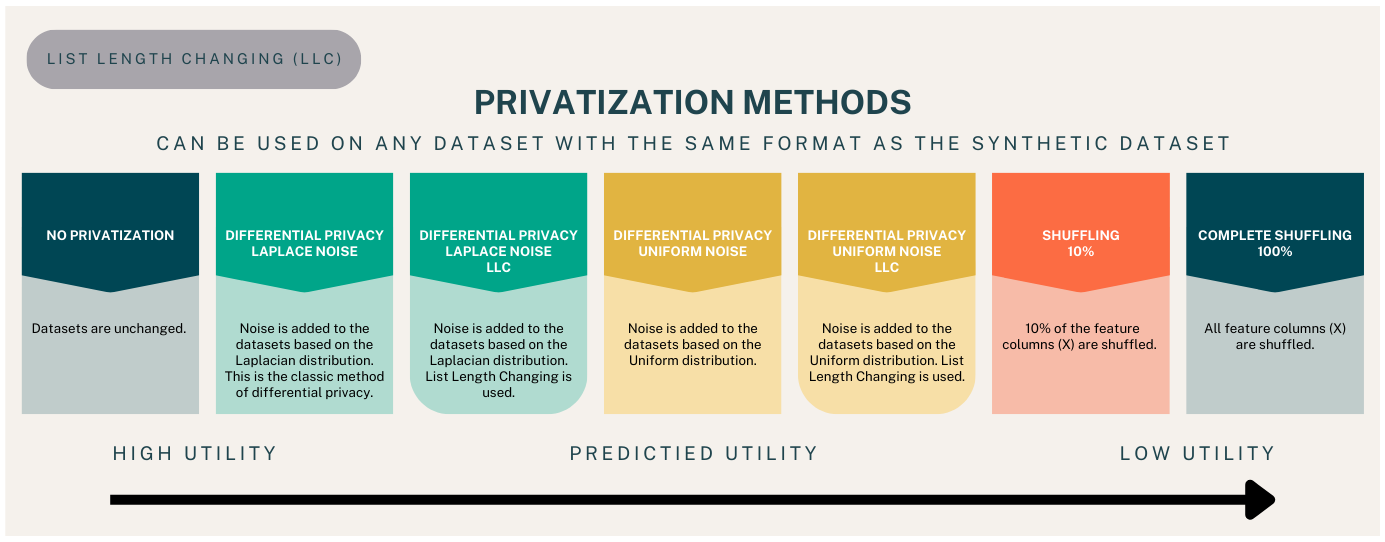

More details can be found in the README file. Let's try basic differential privacy with list lengthening.

In [66]:
privatization_type = 'basic differential privacy'
# Other 'privatization_type' options: 'uniform', 'shuffle', 'full shuffle' (full shuffle shuffles all of the rows)
privatizer = Privatizer(data, style=privatization_type, list_length=True)
# Can set 'list_length' to false if you don't want to allow the list sizes to change

Now we call 'privatize_dataset'. Use the time library to see how long the privatizer takes.

In [67]:
start_time = time.time()
privatized_data = privatizer.privatize_dataset(preprocessed_data)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

0.1786642074584961


'preprocess_dataset' outputs a pandas dataframe. Lets look at how the dataset is structured.

In [68]:
preprocessed_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
 9   career aspirations          100 non-null    object 
 10  future topics               100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


 Lets look at the top 5 elements of the dataframe.

In [69]:
privatized_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities
0,"[1, 0, 1, 1]",3.60,8,[69],"[611, 1549, 2833, 995, 2866, 2613, 2369, 796, ...","[7, 21, 4, 11, 10]","[44, 214, 88, 220, 100, 30, 198, 40, 63, 77, 8...","[75, 106, 101, 18, 113, 82, 70, 36, 76, 103, 2...","[74, 82, 72, 163, 14, 82, 181, 165, 14, 84, 86..."
1,"[1, 1, 1, 0]",2.48,2,[],"[603, 1676, 2862, 220, 3186, 2593, 335, 3307, ...",[],"[112, 196, 225, 166, 106, 33, 142, 51, 179, 56...","[48, 47, 114, 122, 18, 90, 116, 80, 82, 107, 9...","[1, 163, 115, 180, 228, 186, 80, 276, 251, 294..."
2,"[0, 0, 1, 1]",3.07,14,[],"[516, 1791, 1127, 1882, 2545, 2932, 1579, 2889...","[16, 6, 5, 8, 17, 7, 3, 16, 18, 13, 20, 3, 16]","[21, 102, 197, 5, 113, 80, 54, 96, 57, 12, 49,...","[64, 116, 34]",[28]
3,"[1, 1, 1, 0]",2.55,4,"[122, 26]","[3464, 542, 3204, 2613, 237, 2170, 214, 1091, ...","[8, 11, 13, 9, 7, 14, 17, 7, 18, 14, 19, 0, 2,...","[50, 145, 89, 112, 37, 206, 105, 36, 48, 25, 3...","[48, 68, 52, 36, 72, 79, 77, 76, 137, 26, 6, 3...","[98, 170, 142, 137, 259, 110, 289, 187, 111, 1..."
4,"[1, 0, 0, 1]",3.92,4,"[150, 15]","[1704, 291, 26, 1636, 1301, 3318, 3281, 830, 2...","[0, 12, 5, 21, 7, 5, 17, 17, 12, 19, 11, 12]","[5, 228, 95, 30, 126, 13, 71, 218, 205, 229, 4...","[24, 101, 56, 13, 124, 67, 69, 128, 138, 69, 5...","[203, 24, 143, 140, 244, 233, 106, 162, 242]"


## Dimensionality Reduction:

We still have the problem of long lists. The 'previous courses list' can be over 30 elements long! Thus we call a new function from the Preprocessor class, 'create_RNN_models'. Three different recurrent neural network models are used to reduce the dimension of each list to 1 element. The three networks are: Simple, GRU (Gated Recurrent Units), and LSTM (Long Term Short Memory).

Since 'create_RNN_models' takes in a dataframe, there is no need to create a new instance of the Preprocessor class. Thus we should call:
- 'privatized_data': reduce dimensionality
- 'preprocessed_data': give a null for comparison at the end
- 'preprocessed_data' with 'utility=True': reduce dimensionality of the utility columns

Let's also calculate and compare the runtimes.

In [70]:
start_time = time.time()
privatized_data_reduced = preprocessor.create_RNN_models(privatized_data, simple=True)
end_time = time.time()
runtime = end_time - start_time
print(f'Privatized data runtime: {runtime}')

start_time = time.time()
nonprivatized_data_reduced = preprocessor.create_RNN_models(preprocessed_data, simple=True)
end_time = time.time()
runtime = end_time - start_time
print(f'Nonprivatized data runtime: {runtime}')

start_time = time.time()
utility_cols_reduced = preprocessor.create_RNN_models(preprocessed_data, utility=True, simple=True)
end_time = time.time()
runtime = end_time - start_time
print(f'Utility columns runtime: {runtime}')

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 442ms/step - loss: 0.3234
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0844
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 0.1299
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0875
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0951
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0935
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0997
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 867ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - loss: 0.2606
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1127
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1123
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0890
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0823
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0768
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0607
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.2757
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.2153
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1534
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1186
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1051
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0964
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1103
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1060
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0855
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0871
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - loss: 0.2777
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1063
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1231
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0878
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0771
Epoch 6/

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0830
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0796
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - loss: 0.3188
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1644
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0768
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0940
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0795
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0578
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0628
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0638
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0473
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0379
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 454ms/step - loss: 0.3032
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1310
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - loss: 0.0256
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 0.0196
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 0.0158
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 0.0201
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 0.0176
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - loss: 0.2767
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - loss: 0.1955
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - loss: 0.0966
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 740ms/step - loss: 0.1002
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 666ms/step - loss: 0.0944
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 606ms/step - loss: 0.0800
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - loss: 0.0801
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - loss: 0.0725
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - loss: 0.0666
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - loss: 0.0671
4/4 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.1234
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1017
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0894
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0944
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0977
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0922
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - loss: 0.2726
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0872
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1104
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0785
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0819
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0775
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0708
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0661
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0615
Epoch 10/1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0977
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1155
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1125
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0833
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0845
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1013
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0813
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - loss: 0.2749
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.1135
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0974
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.1164
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0871
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0816
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0829
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0795
Epoch 9/1

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - loss: 0.2839
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.2144
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.1508
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0988
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0704
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0753
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0693
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0569
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0503
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0477
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
Utility columns runtime: 81.54003095626831


These functions output a list of dataframes. Although in this case we only produced the Simple RNN model. Regardless we need to take the first element from this list to get the actual dataframes.

In [71]:
privatized_data_reduced = privatized_data_reduced[0]
nonprivatized_data_reduced = nonprivatized_data_reduced[0]
utility_cols_reduced = utility_cols_reduced[0]

Now that we have the pandas dataframes. How are the dataframes structured?

In [72]:
print(privatized_data_reduced.info(verbose=True, show_counts=True))
print(nonprivatized_data_reduced.info(verbose=True, show_counts=True))
print(utility_cols_reduced.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      ---------

Lets look at the top 5 elements for each of the dataframes.

In [73]:
print(privatized_data_reduced.head(n=5))
print(nonprivatized_data_reduced.head(n=5))
print(utility_cols_reduced.head(n=5))
# Change n to larger numbers to see more rows of the dataframe

  learning style   gpa  student semester         major previous courses  \
0   [0.41064033]  3.60                 8  [0.56794417]     [0.38933712]   
1    [0.5326731]  2.48                 2  [0.49009642]     [0.83500713]   
2   [0.43261674]  3.07                14  [0.49009642]     [0.17747438]   
3    [0.5326731]  2.55                 4   [0.7726637]     [0.16246086]   
4   [0.45523536]  3.92                 4   [0.4607145]     [0.15011004]   

   course types course subjects subjects of interest  \
0   [0.4379363]     [0.8601027]         [0.67125124]   
1  [0.40982458]     [0.3995743]          [0.5252058]   
2   [0.3163632]    [0.17030425]         [0.69494444]   
3  [0.04668312]    [0.24886392]           [0.448587]   
4  [0.27355307]    [0.72781265]          [0.9034307]   

  extracurricular activities  
0                [0.7969429]  
1                 [0.635572]  
2                [0.5931009]  
3              [0.104396954]  
4               [0.62678945]  
  learning style   gpa  st

## Preprocess Private Columns:

Now let us calculate the private columns. First we import the PrivateColumns class from 'processing_private_columns'.

In [74]:
try: # Expected pathway for local Jupyter Notebook
    from IntelliShield.data_preprocessing.processing_private_columns import PrivateColumns
except ModuleNotFoundError:
    try: # Expected pathway for Google Colab
        from SummerResearch2024.src.IntelliShield.data_preprocessing.processing_private_columns import PrivateColumns
    except ModuleNotFoundError: # Raise error as neither pathway works
        raise ModuleNotFoundError("You did not properly download or clone the repository.")

Now we instantiate the Private Columns class.

In [75]:
private_cols_processor = PrivateColumns(data)

Now we call the 'get_private_cols' function on the class instance to process the private columns and turn the strings into numerical representations.

In [76]:
privacy_cols_df = private_cols_processor.get_private_cols(synthetic_data)

This function outputs a dataframe. Let's look at the dataframe structure.

In [77]:
privacy_cols_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ethnoracial group     100 non-null    object
 1   gender                100 non-null    object
 2   international status  100 non-null    object
 3   socioeconomic status  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


Additionally, let's examine the top 5 rows of the dataframe.

In [78]:
privacy_cols_df.head(n=5)
# Change n to larger numbers to see more rows of the dataframe

,ethnoracial group,gender,international status,socioeconomic status
0,0,0,0,3
1,2,2,0,3
2,0,0,0,3
3,1,1,0,0
4,2,2,0,4


## Recombining Everything

Now we bring together the feature columns both nonprivatized and privatized with the utility and private columns. Let's specify the columns just to ensure that only the columns we want are in these datasets.

In [79]:
# Privatized Feature Data
privatized_data_reduced = privatized_data_reduced[['learning style','gpa','student semester','major','previous courses','course types','course subjects','subjects of interest','extracurricular activities']]

# Nonprivatized Feature Data
nonprivatized_data_reduced = nonprivatized_data_reduced[['learning style','gpa','student semester','major','previous courses','course types','course subjects','subjects of interest','extracurricular activities']]

# Utility Columns
utility_cols_reduced = utility_cols_reduced[['career aspirations','future topics']]

Now we will concatenate them together using pandas.

In [80]:
privatized_combined_df = pd.concat([privatized_data_reduced, utility_cols_reduced, privacy_cols_df], axis=1)
nonprivatized_combined_df = pd.concat([nonprivatized_data_reduced, utility_cols_reduced, privacy_cols_df], axis=1)

First we examine the structures of both datasets.

In [81]:
print(privatized_combined_df.info(verbose=True, show_counts=True))
print(nonprivatized_combined_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
 9   career aspirations          100 non-null    object 
 10  future topics               100 non-null    object 
 11  ethnoracial group           100 non-null    object 
 12  gender                      100 non-null    object 
 13  international status        100 non-

Then we examine the top five entries of both datasets.

In [82]:
print(privatized_combined_df.head(n=5))
print(nonprivatized_combined_df.head(n=5))
# Change n to larger numbers to see more rows of the dataframe

  learning style   gpa  student semester         major previous courses  \
0   [0.41064033]  3.60                 8  [0.56794417]     [0.38933712]   
1    [0.5326731]  2.48                 2  [0.49009642]     [0.83500713]   
2   [0.43261674]  3.07                14  [0.49009642]     [0.17747438]   
3    [0.5326731]  2.55                 4   [0.7726637]     [0.16246086]   
4   [0.45523536]  3.92                 4   [0.4607145]     [0.15011004]   

   course types course subjects subjects of interest  \
0   [0.4379363]     [0.8601027]         [0.67125124]   
1  [0.40982458]     [0.3995743]          [0.5252058]   
2   [0.3163632]    [0.17030425]         [0.69494444]   
3  [0.04668312]    [0.24886392]           [0.448587]   
4  [0.27355307]    [0.72781265]          [0.9034307]   

  extracurricular activities career aspirations future topics  \
0                [0.7969429]        [0.5971829]  [0.34415188]   
1                 [0.635572]        [0.8321978]   [0.8562126]   
2                

# Calculating Tradeoffs:

The reason for balancing the data privatization is to maximize the utility of the dataset while minimizing the privacy loss of the dataset. Perfectly private data would have no utility and vice versa.

Since our private columns are distinct classes, the privacy loss will be measured with accuracy where we want a low accuracy to keep the data safe. Meanwhile, after the RNNs our utility columns are essentially continuous. Thus utility gain will be measured with error where we want a low error to keep the data useful.

Our first test for this is the classifier decision tree. Since it is a classifier we will be using it to test privacy loss for the private columns. Import the ISDecisionTreeClassification class from 'tradeoffs'. Additionally, we import several functions as in the 'tradeoffs' file there are many shared functions that can be used across Model Class objects.

In [83]:
try: # Expected pathway for local Jupyter Notebook
    from IntelliShield.tradeoffs import ISDecisionTreeClassification, get_best_model, run_model, tree_plotter, confusion_matrix_plotter, calculate_shap_values, plot_shap_values, load_shap_values, get_feature_importance
except ModuleNotFoundError:
    try: # Expected pathway for Google Colab
        from SummerResearch2024.src.IntelliShield.tradeoffs import ISDecisionTreeClassification, get_best_model, run_model, tree_plotter, confusion_matrix_plotter, calculate_shap_values, plot_shap_values, load_shap_values, get_feature_importance
    except ModuleNotFoundError: # Raise error as neither pathway works
        raise ModuleNotFoundError("You did not properly download or clone the repository.")

Let's pick which combination to test the classifier on.

In [84]:
privatization_type = 'Basic_DP' # 'NoPrivatization', 'Basic_DP', 'Basic_DP_LLC', 'Uniform', 'Uniform_LLC', 'Shuffling', 'Complete_Shuffling'
RNN_model = 'Simple1' # 'GRU1', 'LSTM1', 'Simple1'
target = 'ethnoracial group' # 'ethnoracial group', 'gender', 'international status', 'socioeconomic status'

Initate the ISDecisionTreeClassification class.

In [85]:
privatized_classifier = ISDecisionTreeClassification(privatization_type, RNN_model, target, privatized_combined_df)

Next we use cost complexity pruning to get the best Decision Tree model and it's acompanying ccp_alpha. The model is trained on just a small subset of the data. This function will print out several figures comparing various factors to alpha values.

In [87]:
best_model, ccp_alpha = get_best_model(privatized_classifier, save_model=False, show_fig=True, save_fig=False, return_model=True, return_ccp_alpha=True)
print(f'This is what a model object looks like: {best_model}')
print(f"This is the model's ccp alpha value: {ccp_alpha}")

TypeError: get_best_model() got an unexpected keyword argument 'show_fig'

Next, we use this best model and run a full model on all the data. This also prints the model's classification report.

In [ ]:
run_model(classifier, best_model, ccp_alpha, print_report=True)

Next we plot the first two splits of the best model.

In [ ]:
tree_plotter(classifier, save_fig=False, show_fig=True, max_depth=2) # Change max_depth to generate a tree with more splits

Then we calculate and plot the confusion matrix for the model.

In [ ]:
confusion_matrix_plotter(classifier, show_fig=True)

The following cells are under construction and do not yet work.

In [ ]:
calculate_shap_values(classifier)
try:
    plot_shap_values(classifier)
except:
    load_shap_values(classifier, f'../outputs/examples/notebook_files/shap_values.npy')
    plot_shap_values(classifier)

In [ ]:
get_feature_importance(classifier)

# Comparing Models: